# Protein Expression Level Averages

Visualizing protein expression levels using a heat map.

In [105]:
# Data processing libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt

In [106]:
# read dataset and eliminate all missing values
df = pd.read_csv("Data_Cortex_Nuclear.csv")
df = df.dropna()

# convert strings to numbers
df['Genotype'] = df['Genotype'].map({'Control': 0, 'Ts65Dn': 1})
df['Treatment'] = df['Treatment'].map({'Memantine': 0, 'Saline': 1})
df['Behavior'] = df['Behavior'].map({'C/S': 0, 'S/C': 1})

# create training and testing data:
# 2D matrix with information on genotype, treatmnet and behavior
df_training = df[["Genotype", "Treatment", "Behavior"]].values
# 2D matrix with protein expression levels
df_label = df.drop(columns=["MouseID", "Genotype", "Treatment", "Behavior", "class"]).values

In [108]:
unique_data = [list(x) for x in set(tuple(x) for x in df_training)]

In [109]:
total_list = []
for combination in unique_data:
    temp_list = []
    for sample, expression in zip(df_training, df_label):
        if np.array_equal(sample, np.array(combination)):
            temp_list.append(expression)
    total_list.append(temp_list)
total_list = np.array(total_list)

In [110]:
averages_list = []
for sub_list in total_list:
    averages_list.append(np.array(sub_list).sum(axis=0)/len(sub_list[0]))

## Visualizing Protein Expression Levels

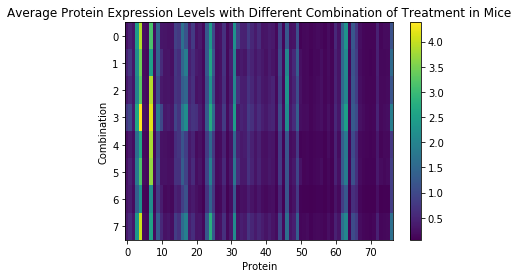

In [111]:
fig, ax = plt.subplots(1,1)
im = ax.imshow(averages_list, cmap='viridis',  aspect='auto')
plt.ylabel("Combination")
plt.xlabel("Protein")
fig.colorbar(im)
plt.title("Average Protein Expression Levels with Different Combination of Treatment in Mice")
plt.show()

## Raw protein expression level data

In [112]:
for row, label in zip(averages_list, unique_data):
    print(f"Average protein expression levels for {label}")
    print(row)
    print(end='\n')

Average protein expression levels for [0, 1, 1]
[0.26971482 0.45291764 0.30852956 2.4372993  3.88954882 0.23146145
 0.18223476 3.14751004 0.21619951 1.45714604 0.32068238 0.30622769
 0.28083544 0.27410639 0.87281117 0.78117986 1.65823967 1.16033563
 0.41388109 0.7958366  0.26683038 0.37198093 0.1705284  1.25118729
 2.41869367 1.01363763 0.23611095 0.2699048  0.67531255 0.17027289
 0.35327633 2.26215166 0.89411436 0.47817049 0.45820376 0.79027448
 0.54822591 0.37033081 0.5936724  0.28258404 0.30109068 0.38682015
 0.36089474 0.16786582 0.89173152 0.14117483 1.24325288 0.2643739
 0.28985167 1.09205447 0.0971905  0.1515103  0.1718301  0.12821674
 0.15327852 0.19085898 0.16164302 0.10764103 0.21271328 0.11214854
 0.55551914 0.27556087 1.47922603 2.27411766 0.16668442 1.2340927
 0.76764186 0.22856164 0.14474817 0.12739043 0.12821674 0.12779909
 0.45298651 0.13336426 0.18240295 0.19436469 1.13361287]

Average protein expression levels for [1, 1, 0]
[0.47736563 0.72336296 0.30162034 2.17119846